## Pandas advanced functionalities

In [1]:
import numpy as np
import pandas as pd

Let's import the movies database again

In [2]:
imdb_movies = pd.read_csv("../datasets/imdb-movies.csv")
imdb_movies.set_index('Rank', inplace=True)
imdb_movies.shape

(1000, 10)

In [3]:
imdb_movies.head()

,Title,Genre,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actors
Rank,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,2014,121,8.1,757074,333.13,76.0,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..."
2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,2012,124,7.0,485820,126.46,65.0,"Noomi Rapace, Logan Marshall-Green, Michael Fa..."
3,Split,"Horror,Thriller",M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar..."
4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,"Matthew McConaughey,Reese Witherspoon, Seth Ma..."
5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,2016,123,6.2,393727,325.02,40.0,"Will Smith, Jared Leto, Margot Robbie, Viola D..."


#### Challenge: Which are the most and the least common genres in our dataset?

In [4]:
genre = imdb_movies.loc[1]['Genre']

In [5]:
genre

'Action,Adventure,Sci-Fi'

In [6]:
genres = genre.split(',')
genres

['Action', 'Adventure', 'Sci-Fi']

In [7]:
def split_by_comma(input_string):
    return input_string.split(',')

imdb_movies['Genres'] = imdb_movies['Genre'].apply(split_by_comma)

In [8]:
imdb_movies.head()

,Title,Genre,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actors,Genres
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,2014,121,8.1,757074,333.13,76.0,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...","[Action, Adventure, Sci-Fi]"
2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,2012,124,7.0,485820,126.46,65.0,"Noomi Rapace, Logan Marshall-Green, Michael Fa...","[Adventure, Mystery, Sci-Fi]"
3,Split,"Horror,Thriller",M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...","[Horror, Thriller]"
4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,"Matthew McConaughey,Reese Witherspoon, Seth Ma...","[Animation, Comedy, Family]"
5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,2016,123,6.2,393727,325.02,40.0,"Will Smith, Jared Leto, Margot Robbie, Viola D...","[Action, Adventure, Fantasy]"


In [9]:
imdb_movies['Actors'] = imdb_movies['Actors'].apply(split_by_comma)

In [10]:
del imdb_movies['Genre']

In [11]:
imdb_movies.head()

,Title,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actors,Genres
Rank,,,,,,,,,,
1,Guardians of the Galaxy,James Gunn,2014,121,8.1,757074,333.13,76.0,"[Chris Pratt, Vin Diesel, Bradley Cooper, Z...","[Action, Adventure, Sci-Fi]"
2,Prometheus,Ridley Scott,2012,124,7.0,485820,126.46,65.0,"[Noomi Rapace, Logan Marshall-Green, Michael...","[Adventure, Mystery, Sci-Fi]"
3,Split,M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,"[James McAvoy, Anya Taylor-Joy, Haley Lu Ric...","[Horror, Thriller]"
4,Sing,Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,"[Matthew McConaughey, Reese Witherspoon, Seth...","[Animation, Comedy, Family]"
5,Suicide Squad,David Ayer,2016,123,6.2,393727,325.02,40.0,"[Will Smith, Jared Leto, Margot Robbie, Vio...","[Action, Adventure, Fantasy]"


In [12]:
imdb_movies_unwinded_genres = imdb_movies.explode('Genres').reset_index()
imdb_movies_unwinded_genres

,Rank,Title,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actors,Genres
0,1,Guardians of the Galaxy,James Gunn,2014,121,8.1,757074,333.13,76.0,"[Chris Pratt, Vin Diesel, Bradley Cooper, Z...",Action
1,1,Guardians of the Galaxy,James Gunn,2014,121,8.1,757074,333.13,76.0,"[Chris Pratt, Vin Diesel, Bradley Cooper, Z...",Adventure
2,1,Guardians of the Galaxy,James Gunn,2014,121,8.1,757074,333.13,76.0,"[Chris Pratt, Vin Diesel, Bradley Cooper, Z...",Sci-Fi
3,2,Prometheus,Ridley Scott,2012,124,7.0,485820,126.46,65.0,"[Noomi Rapace, Logan Marshall-Green, Michael...",Adventure
4,2,Prometheus,Ridley Scott,2012,124,7.0,485820,126.46,65.0,"[Noomi Rapace, Logan Marshall-Green, Michael...",Mystery
...,...,...,...,...,...,...,...,...,...,...,...
2550,999,Search Party,Scot Armstrong,2014,93,5.6,4881,NaN,22.0,"[Adam Pally, T.J. Miller, Thomas Middleditch...",Adventure
2551,999,Search Party,Scot Armstrong,2014,93,5.6,4881,NaN,22.0,"[Adam Pally, T.J. Miller, Thomas Middleditch...",Comedy
2552,1000,Nine Lives,Barry Sonnenfeld,2016,87,5.3,12435,19.64,11.0,"[Kevin Spacey, Jennifer Garner, Robbie Amell...",Comedy
2553,1000,Nine Lives,Barry Sonnenfeld,2016,87,5.3,12435,19.64,11.0,"[Kevin Spacey, Jennifer Garner, Robbie Amell...",Family


In [13]:
imdb_movies_unwinded_genres.Genres.value_counts(ascending=False)

Drama        513
Action       303
Comedy       279
Adventure    259
Thriller     195
Crime        150
Romance      141
Sci-Fi       120
Horror       119
Mystery      106
Fantasy      101
Biography     81
Family        51
Animation     49
History       29
Sport         18
Music         16
War           13
Western        7
Musical        5
Name: Genres, dtype: int64

<AxesSubplot:>

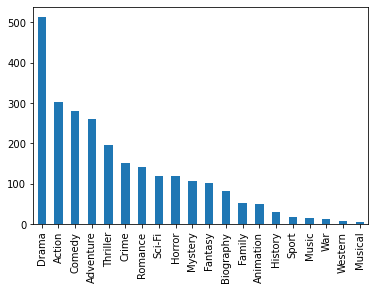

In [14]:
imdb_movies_unwinded_genres.Genres.value_counts().plot(kind="bar")

In [15]:
# Find the highest Revenue / Metascore ratio

revenue_to_metascore_ratio = imdb_movies['Revenue (Millions)'] / imdb_movies['Metascore']
revenue_to_metascore_ratio

Rank
1       4.383289
2       1.945538
3       2.227742
4       4.581695
5       8.125500
          ...   
996          NaN
997     0.381304
998     1.160200
999          NaN
1000    1.785455
Length: 1000, dtype: float64

In [16]:
imdb_movies_sorted_by_ratio = imdb_movies.loc[:, ['Title', 'Director', 'Rating', 'Revenue (Millions)']]

In [17]:
imdb_movies_sorted_by_ratio['Revenue/Metascore Ratio'] = revenue_to_metascore_ratio
imdb_movies_sorted_by_ratio.sort_values(by='Revenue/Metascore Ratio', inplace=True, ascending=False)
imdb_movies_sorted_by_ratio.head()

,Title,Director,Rating,Revenue (Millions),Revenue/Metascore Ratio
Rank,,,,,
51,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,8.1,936.63,11.563333
711,Transformers: Revenge of the Fallen,Michael Bay,6.0,402.08,11.488000
86,Jurassic World,Colin Trevorrow,7.0,652.18,11.053898
88,Avatar,James Cameron,7.8,760.51,9.162771
77,The Avengers,Joss Whedon,8.1,623.28,9.033043


In [18]:
# rows = []
# _ = imdb_movies.apply(
#     lambda row: [rows.append([row.Title, row.Director, actor]) for actor in row.Actors],
#     axis=1
# )
# imdb_movies_unwinded = pd.DataFrame(
#     rows,
#     columns=['Title', 'Director', 'Actor']).set_index(['Director', 'Title']
# )
# imdb_movies_unwinded

## Split, Apply, Combine

In [19]:
imdb_movies = pd.read_csv("../datasets/imdb-movies.csv")
imdb_movies.set_index('Rank', inplace=True)

In [20]:
imdb_movies.sample(3)

,Title,Genre,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actors
Rank,,,,,,,,,,
252,Kynodontas,"Drama,Thriller",Yorgos Lanthimos,2009,94,7.3,50946,0.11,73.0,"Christos Stergioglou, Michele Valley, Angeliki..."
513,The Happening,"Sci-Fi,Thriller",M. Night Shyamalan,2008,91,5.0,170897,64.51,34.0,"Mark Wahlberg, Zooey Deschanel, John Leguizamo..."
961,Trance,"Crime,Drama,Mystery",Danny Boyle,2013,101,7.0,97141,2.32,61.0,"James McAvoy, Rosario Dawson, Vincent Cassel,D..."


### Which director generated the highest average income?

The goal of our analysis will be to find which director generated on average more income.
We will have to:

1) split the dataframe according to movie director

2) compute the average income per director

3) combine the results

In [21]:
# Split
COLUMNS_TO_SELECT = [
    "Runtime (Minutes)",
    "Revenue (Millions)",
    "Rating",
    "Metascore",
    "Director"
]
grouped_by_director = imdb_movies[COLUMNS_TO_SELECT].groupby('Director')
type(grouped_by_director)

pandas.core.groupby.generic.DataFrameGroupBy

In [22]:
grouped_by_director.describe()

Runtime (Minutes)                                    \
                                count    mean        std    min     25%   
Director                                                                  
Aamir Khan                        1.0  165.00        NaN  165.0  165.00   
Abdellatif Kechiche               1.0  180.00        NaN  180.0  180.00   
Adam Leon                         1.0   82.00        NaN   82.0   82.00   
Adam McKay                        4.0  110.75  13.598407   98.0  104.75   
Adam Shankman                     2.0  120.00   4.242641  117.0  118.50   
...                               ...     ...        ...    ...     ...   
Xavier Dolan                      2.0  118.00  29.698485   97.0  107.50   
Yimou Zhang                       1.0  103.00        NaN  103.0  103.00   
Yorgos Lanthimos                  2.0  106.50  17.677670   94.0  100.25   
Zack Snyder                       5.0  136.60  22.277792  110.0  117.00   
Zackary Adler                     1.0  110.00        NaN  110.0  110.00   

                                          Revenue (Millions)           ...  \
                       50%     75%    max              count     mean  ...   
Director                                                               ...   
Aamir Khan           165.0  165.00  165.0                1.0    1.200  ...   
Abdellatif Kechiche  180.0  180.00  180.0                1.0    2.200  ...   
Adam Leon             82.0   82.00   82.0                0.0      NaN  ...   
Adam McKay           107.5  113.50  130.0                4.0  109.535  ...   
Adam Shankman        120.0  121.50  123.0                2.0   78.665  ...   
...                    ...     ...    ...                ...      ...  ...   
Xavier Dolan         118.0  128.50  139.0                1.0    3.490  ...   
Yimou Zhang          103.0  103.00  103.0                1.0   45.130  ...   
Yorgos Lanthimos     106.5  112.75  119.0                2.0    4.405  ...   
Zack Snyder          143.0  151.00  162.0                5.0  195.148  ...   
Zackary Adler        110.0  110.00  110.0                1.0    6.530  ...   

                    Rating      Metascore                                      \
                       75%  max     count  mean        std   min    25%   50%   
Director                                                                        
Aamir Khan           8.500  8.5       1.0  42.0        NaN  42.0  42.00  42.0   
Abdellatif Kechiche  7.800  7.8       1.0  88.0        NaN  88.0  88.00  88.0   
Adam Leon            6.500  6.5       1.0  77.0        NaN  77.0  77.00  77.0   
Adam McKay           7.125  7.8       4.0  65.5  12.288206  51.0  60.75  65.0   
Adam Shankman        6.500  6.7       2.0  64.0  24.041631  47.0  55.50  64.0   
...                    ...  ...       ...   ...        ...   ...    ...   ...   
Xavier Dolan         7.825  8.1       2.0  61.0  18.384776  48.0  54.50  61.0   
Yimou Zhang          6.100  6.1       1.0  42.0        NaN  42.0  42.00  42.0   
Yorgos Lanthimos     7.250  7.3       2.0  77.5   6.363961  73.0  75.25  77.5   
Zack Snyder          7.600  7.7       5.0  48.0   9.617692  33.0  44.00  52.0   
Zackary Adler        5.100  5.1       1.0  90.0        NaN  90.0  90.00  90.0   

                                  
                       75%   max  
Director                          
Aamir Khan           42.00  42.0  
Abdellatif Kechiche  88.00  88.0  
Adam Leon            77.00  77.0  
Adam McKay           69.75  81.0  
Adam Shankman        72.50  81.0  
...                    ...   ...  
Xavier Dolan         67.50  74.0  
Yimou Zhang          42.00  42.0  
Yorgos Lanthimos     79.75  82.0  
Zack Snyder          55.00  56.0  
Zackary Adler        90.00  90.0  

[644 rows x 32 columns]

The `groups` attribute is a `dict` whose keys are the computed unique groups and corresponding values being the axis labels belonging to each group. In the above example we have:

In [23]:
grouped_by_director.groups

{'Aamir Khan': [992], 'Abdellatif Kechiche': [312], 'Adam Leon': [784], 'Adam McKay': [143, 361, 470, 936], 'Adam Shankman': [487, 973], 'Adam Wingard': [724, 730], 'Afonso Poyart': [652], 'Aisling Walsh': [840], 'Akan Satayev': [197], 'Akiva Schaffer': [654], 'Alan Taylor': [215, 244], 'Albert Hughes': [492], 'Alejandro Amenábar': [667], 'Alejandro González Iñárritu': [130, 261, 886], 'Alessandro Carloni': [604], 'Alex Garland': [110], 'Alex Proyas': [216], 'Alex Ranarivelo': [368], 'Alexander Payne': [952], 'Alexandre Aja': [859, 865, 866, 889], 'Alexandros Avranas': [539], 'Alexi Pappas': [338], 'Alfonso Cuarón': [247, 510], 'Alfonso Gomez-Rejon': [951], 'Allen Coulter': [861], 'Amber Tamblyn': [479], 'Amma Asante': [809], 'Ana Lily Amirpour': [113], 'Andrea Arnold': [226], 'Andrew Dominik': [614], 'Andrew Jarecki': [580], 'Andrew Niccol': [240, 324], 'Andrew Stanton': [120, 390, 635], 'Andrey Kravchuk': [523], 'André Øvredal': [62], 'Andrés Muschietti': [812], 'Andy Fickman': [594]

In [24]:
imdb_movies.loc[992]

Title                                                  Taare Zameen Par
Genre                                                Drama,Family,Music
Director                                                     Aamir Khan
Year                                                               2007
Runtime (Minutes)                                                   165
Rating                                                              8.5
Votes                                                            102697
Revenue (Millions)                                                  1.2
Metascore                                                          42.0
Actors                Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...
Name: 992, dtype: object

### Apply and combine phase

After the group-by operation there are a wide range of options for the "apply" phase

1) Aggregations using the `.aggregate()` or `.agg()` method of `DataFrameGroupBy`
    a) as a special case you can use Pandas built-in aggregation methods (`count`, `mean`, etc...)
    
2) Transformations using the `.transform()` method

3) Filtrations using the `.filter()` method

4) A generalisation of the two above using the `.apply()` method

In this case we will have to perform an aggregation.

In [25]:
### Get the mean value for the three features for each director
grouped_by_director.mean()

,Runtime (Minutes),Revenue (Millions),Rating,Metascore
Director,,,,
Aamir Khan,165.00,1.200,8.50,42.0
Abdellatif Kechiche,180.00,2.200,7.80,88.0
Adam Leon,82.00,NaN,6.50,77.0
Adam McKay,110.75,109.535,7.00,65.5
Adam Shankman,120.00,78.665,6.30,64.0
...,...,...,...,...
Xavier Dolan,118.00,3.490,7.55,61.0
Yimou Zhang,103.00,45.130,6.10,42.0
Yorgos Lanthimos,106.50,4.405,7.20,77.5


In [26]:
grouped_by_director.mean().sort_values(by="Revenue (Millions)", ascending=False)

,Runtime (Minutes),Revenue (Millions),Rating,Metascore
Director,,,,
James Cameron,162.0,760.510,7.80,83.0
Colin Trevorrow,124.0,652.180,7.00,59.0
Joss Whedon,142.0,541.135,7.75,67.5
Lee Unkrich,103.0,414.980,8.30,92.0
Gary Ross,140.5,408.000,7.05,68.0
...,...,...,...,...
Todor Chapkanov,86.0,NaN,7.40,NaN
Tyler Shields,90.0,NaN,4.70,56.0
Walter Hill,95.0,NaN,4.50,34.0


### Challenge: Find the 10 directors which generated the highest and lowest average income, but filter out directors who have directed less than 3 movies

In [27]:
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1000 non-null   object 
 1   Genre               1000 non-null   object 
 2   Director            1000 non-null   object 
 3   Year                1000 non-null   int64  
 4   Runtime (Minutes)   1000 non-null   int64  
 5   Rating              1000 non-null   float64
 6   Votes               1000 non-null   int64  
 7   Revenue (Millions)  872 non-null    float64
 8   Metascore           936 non-null    float64
 9   Actors              1000 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 118.2+ KB


In [28]:
# ...answer the challenge here...
num_of_movies = grouped_by_director.count()["Runtime (Minutes)"]
num_of_movies

Director
Aamir Khan             1
Abdellatif Kechiche    1
Adam Leon              1
Adam McKay             4
Adam Shankman          2
                      ..
Xavier Dolan           2
Yimou Zhang            1
Yorgos Lanthimos       2
Zack Snyder            5
Zackary Adler          1
Name: Runtime (Minutes), Length: 644, dtype: int64

In [29]:
director_revenues = grouped_by_director.mean()["Revenue (Millions)"]

In [30]:
director_revenues[num_of_movies > 3].sort_values(ascending=False).head(10)

Director
J.J. Abrams          336.690000
Francis Lawrence     324.952500
Christopher Nolan    303.018000
David Yates          271.751667
Jon Favreau          256.400000
Michael Bay          236.886667
Peter Jackson        215.112500
Gore Verbinski       207.455000
Zack Snyder          195.148000
Justin Lin           164.958000
Name: Revenue (Millions), dtype: float64

In [31]:
director_revenues[num_of_movies > 3].sort_values(ascending=False).tail(10)

Director
D.J. Caruso           59.665000
Robert Zemeckis       56.530000
Denis Villeneuve      43.242000
Danny Boyle           36.680000
Paul W.S. Anderson    34.820000
Joe Wright            34.732500
Mike Flanagan         31.295000
Woody Allen           28.238000
Alexandre Aja         22.313333
Lars von Trier         1.137500
Name: Revenue (Millions), dtype: float64

## Other aggregation techniques

With `.agg()` we can get more than one statistics at once

In [32]:
# Get all the statistics about directors
directors_stats = grouped_by_director.agg([np.mean, np.median, np.std])
directors_stats

Runtime (Minutes)                   Revenue (Millions)  \
                                 mean median        std               mean   
Director                                                                     
Aamir Khan                     165.00  165.0        NaN              1.200   
Abdellatif Kechiche            180.00  180.0        NaN              2.200   
Adam Leon                       82.00   82.0        NaN                NaN   
Adam McKay                     110.75  107.5  13.598407            109.535   
Adam Shankman                  120.00  120.0   4.242641             78.665   
...                               ...    ...        ...                ...   
Xavier Dolan                   118.00  118.0  29.698485              3.490   
Yimou Zhang                    103.00  103.0        NaN             45.130   
Yorgos Lanthimos               106.50  106.5  17.677670              4.405   
Zack Snyder                    136.60  143.0  22.277792            195.148   
Zackary Adler                  110.00  110.0        NaN              6.530   

                                         Rating                  Metascore  \
                      median         std   mean median       std      mean   
Director                                                                     
Aamir Khan             1.200         NaN   8.50   8.50       NaN      42.0   
Abdellatif Kechiche    2.200         NaN   7.80   7.80       NaN      88.0   
Adam Leon                NaN         NaN   6.50   6.50       NaN      77.0   
Adam McKay           109.845   32.740526   7.00   6.80  0.547723      65.5   
Adam Shankman         78.665   56.787746   6.30   6.30  0.565685      64.0   
...                      ...         ...    ...    ...       ...       ...   
Xavier Dolan           3.490         NaN   7.55   7.55  0.777817      61.0   
Yimou Zhang           45.130         NaN   6.10   6.10       NaN      42.0   
Yorgos Lanthimos       4.405    6.074047   7.20   7.20  0.141421      77.5   
Zack Snyder          210.590  123.056792   7.04   7.10  0.661816      48.0   
Zackary Adler          6.530         NaN   5.10   5.10       NaN      90.0   

                                       
                    median        std  
Director                               
Aamir Khan            42.0        NaN  
Abdellatif Kechiche   88.0        NaN  
Adam Leon             77.0        NaN  
Adam McKay            65.0  12.288206  
Adam Shankman         64.0  24.041631  
...                    ...        ...  
Xavier Dolan          61.0  18.384776  
Yimou Zhang           42.0        NaN  
Yorgos Lanthimos      77.5   6.363961  
Zack Snyder           52.0   9.617692  
Zackary Adler         90.0        NaN  

[644 rows x 12 columns]

In [33]:
# get all the statistics about Runtime
directors_stats.loc[:, "Runtime (Minutes)"]

,mean,median,std
Director,,,
Aamir Khan,165.00,165.0,NaN
Abdellatif Kechiche,180.00,180.0,NaN
Adam Leon,82.00,82.0,NaN
Adam McKay,110.75,107.5,13.598407
Adam Shankman,120.00,120.0,4.242641
...,...,...,...
Xavier Dolan,118.00,118.0,29.698485
Yimou Zhang,103.00,103.0,NaN
Yorgos Lanthimos,106.50,106.5,17.677670


In [34]:
# get all the average Runtime for actor movies
directors_stats.loc[:, "Runtime (Minutes)"]["mean"].sort_values(ascending=False)

Director
Abdellatif Kechiche     180.0
Aamir Khan              165.0
Andrea Arnold           163.0
James Cameron           162.0
Maren Ade               162.0
                        ...  
Dan Berk                 81.0
Michael Dudok de Wit     80.0
Justin Tipping           80.0
Shawn Burkett            73.0
Claude Barras            66.0
Name: mean, Length: 644, dtype: float64

In [35]:
custom_directors_stats = grouped_by_director.agg([
    lambda x: x.max() - x.min(),
    lambda x: x.mean() - x.median()
])
custom_directors_stats

Runtime (Minutes)            Revenue (Millions)  \
                           <lambda_0> <lambda_1>         <lambda_0>   
Director                                                              
Aamir Khan                          0       0.00               0.00   
Abdellatif Kechiche                 0       0.00               0.00   
Adam Leon                           0       0.00                NaN   
Adam McKay                         32       3.25              77.97   
Adam Shankman                       6       0.00              80.31   
...                               ...        ...                ...   
Xavier Dolan                       42       0.00               0.00   
Yimou Zhang                         0       0.00               0.00   
Yorgos Lanthimos                   25       0.00               8.59   
Zack Snyder                        52      -6.40             293.87   
Zackary Adler                       0       0.00               0.00   

                                   Rating             Metascore             
                    <lambda_1> <lambda_0> <lambda_1> <lambda_0> <lambda_1>  
Director                                                                    
Aamir Khan               0.000        0.0       0.00        0.0        0.0  
Abdellatif Kechiche      0.000        0.0       0.00        0.0        0.0  
Adam Leon                  NaN        0.0       0.00        0.0        0.0  
Adam McKay              -0.310        1.2       0.20       30.0        0.5  
Adam Shankman            0.000        0.8       0.00       34.0        0.0  
...                        ...        ...        ...        ...        ...  
Xavier Dolan             0.000        1.1       0.00       26.0        0.0  
Yimou Zhang              0.000        0.0       0.00        0.0        0.0  
Yorgos Lanthimos         0.000        0.2       0.00        9.0        0.0  
Zack Snyder            -15.442        1.6      -0.06       23.0       -4.0  
Zackary Adler            0.000        0.0       0.00        0.0        0.0  

[644 rows x 8 columns]

In [36]:
## Named aggregations

# Get all the statistics about directors
custom_directors_stats = grouped_by_director.agg(
    runtime_min_max_diff=pd.NamedAgg(
        column="Runtime (Minutes)",
        aggfunc=lambda x: x.max() - x.min()
    ),
    runtime_mean_median_diff=pd.NamedAgg(
        column="Runtime (Minutes)",
        aggfunc=lambda x: x.mean() - x.median()
    )
)
custom_directors_stats

,runtime_min_max_diff,runtime_mean_median_diff
Director,,
Aamir Khan,0,0.00
Abdellatif Kechiche,0,0.00
Adam Leon,0,0.00
Adam McKay,32,3.25
Adam Shankman,6,0.00
...,...,...
Xavier Dolan,42,0.00
Yimou Zhang,0,0.00
Yorgos Lanthimos,25,0.00


### Data Transformation with `.transform()`

The `.transform()` method returns an object that is indexed the same (same size) as the one being grouped. 

#### Which 10 movies have earned more with respect to the average yearly movie revenue of the year they came out?

In [37]:
COLUMNS_TO_SELECT = [
    "Runtime (Minutes)",
    "Revenue (Millions)",
    "Rating",
    "Metascore",
    "Year"
]
res = imdb_movies[COLUMNS_TO_SELECT].groupby("Year").transform(lambda x: x - x.mean())
res

,Runtime (Minutes),Revenue (Millions),Rating,Metascore
Rank,,,,
1,6.510204,248.051277,1.262245,18.684211
2,4.890625,18.486719,0.075000,3.854839
3,9.626263,83.429024,0.863300,3.716418
4,0.626263,215.629024,0.763300,0.716418
5,15.626263,270.329024,-0.236700,-18.283582
...,...,...,...,...
996,-3.496063,NaN,-0.402362,-12.040650
997,-27.622642,-70.342245,-1.633962,-18.500000
998,-12.826923,-41.072745,-0.584615,-7.408163


In [38]:
# insert the title column at the beginning of the DF
res.insert(loc=0, column='Title', value=imdb_movies['Title'])

# show first 10 movies by mean-normalised revenue, descending
res.sort_values(by="Revenue (Millions)", ascending=False).head(10)

,Title,Runtime (Minutes),Revenue (Millions),Rating,Metascore
Rank,,,,,
51,Star Wars: Episode VII - The Force Awakens,21.503937,858.274956,1.497638,23.959350
88,Avatar,45.882353,647.908723,0.839216,25.877551
86,Jurassic World,9.503937,573.824956,0.397638,1.959350
77,The Avengers,23.890625,515.306719,1.175000,7.854839
13,Rogue One,25.626263,477.479024,1.463300,6.716418
55,The Dark Knight,41.173077,434.237255,2.215385,24.591837
120,Finding Dory,-10.373737,431.599024,0.963300,18.716418
95,Avengers: Age of Ultron,26.503937,380.634956,0.797638,8.959350
36,Captain America: Civil War,39.626263,353.389024,1.463300,16.716418


### Filtration with `.filter()`

The filter method returns a subset of the original object.

##### Get all the movies by Directors whose average rating is higher than 7.5

In [39]:
def is_greater_than_avg(group: pd.DataFrame) -> bool:
    return group["Rating"].mean() > 7.5

imdb_movies[["Title", "Director", "Rating", "Year"]] \
    .groupby("Director") \
    .filter(is_greater_than_avg) \
    .sort_values(by="Rating", ascending=False)

,Title,Director,Rating,Year
Rank,,,,
55,The Dark Knight,Christopher Nolan,9.0,2008
81,Inception,Christopher Nolan,8.8,2010
118,Dangal,Nitesh Tiwari,8.8,2016
37,Interstellar,Christopher Nolan,8.6,2014
97,Kimi no na wa,Makoto Shinkai,8.6,2016
...,...,...,...,...
966,Inland Empire,David Lynch,7.0,2006
979,It's Only the End of the World,Xavier Dolan,7.0,2016
870,Mission: Impossible III,J.J. Abrams,6.9,2006


### More generic operations with `.apply()`

The generic `.apply()` method can be used in lieu of either `.aggregate()` and `.transform()` in many standard use cases.

However, apply can handle some exceptional use cases, as in the example below:

In [40]:
grouped_by_director = imdb_movies.groupby('Director')["Revenue (Millions)"]
type(grouped_by_director)

pandas.core.groupby.generic.SeriesGroupBy

In [41]:
def func(group: pd.Series) -> pd.DataFrame:
    return pd.DataFrame({
        'original': group,
        'mean_normalized': group - group.mean(),
        'median_normalized': group - group.median()
    })

grouped_by_director.apply(func)

,original,mean_normalized,median_normalized
Rank,,,
1,333.13,219.390000,325.360
2,126.46,36.577500,41.345
3,138.12,64.022000,73.610
4,270.32,0.000000,0.000
5,325.02,174.450000,239.310
...,...,...,...
996,NaN,NaN,NaN
997,17.54,9.286667,10.350
998,58.01,-23.840000,-7.020


### Multi-indexing

Lets' suppose we have an experimenyal scenatio with three groups two test groups and one control group.

Each group has three subjects

We will use the group as the first level in our hierarchical index and the subject as the second level.

In [42]:
index_lists = [
    [
        'control', 'control', 'control', 
        'test_first', 'test_first', 'test_first', 
        'test_second', 'test_second', 'test_second'
    ],
    [
        'subj_0', 'subj_1', 'subj_2',
        'subj_0', 'subj_1', 'subj_2',
        'subj_0', 'subj_1', 'subj_2',
    ]
]
tups = list(zip(*index_lists))
tups

[('control', 'subj_0'),
 ('control', 'subj_1'),
 ('control', 'subj_2'),
 ('test_first', 'subj_0'),
 ('test_first', 'subj_1'),
 ('test_first', 'subj_2'),
 ('test_second', 'subj_0'),
 ('test_second', 'subj_1'),
 ('test_second', 'subj_2')]

We use `MultiIndex.from_tuples()` to create out hierarchical index

In [43]:
index = pd.MultiIndex.from_tuples(tups)
index

MultiIndex([(    'control', 'subj_0'),
            (    'control', 'subj_1'),
            (    'control', 'subj_2'),
            ( 'test_first', 'subj_0'),
            ( 'test_first', 'subj_1'),
            ( 'test_first', 'subj_2'),
            ('test_second', 'subj_0'),
            ('test_second', 'subj_1'),
            ('test_second', 'subj_2')],
           )

We simulate to features/variables observed on our subjects using random distributions

### Computational Tools


In [45]:
imdb_movies.cov()

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Year,10.278189,-9.944621e+00,-0.640206,-2.492701e+05,-4.167756e+01,-4.334974e+00
Runtime (Minutes),-9.944621,3.538503e+02,6.975285,1.445394e+06,5.155245e+02,6.761584e+01
Rating,-0.640206,6.975285e+00,0.893836,9.128979e+04,1.981433e+01,1.016151e+01
Votes,-249270.096762,1.445394e+06,91289.789674,3.563134e+10,1.268983e+07,1.067272e+06
Revenue (Millions),-41.677565,5.155245e+02,19.814329,1.268983e+07,1.066129e+04,2.523088e+02
Metascore,-4.334974,6.761584e+01,10.161506,1.067272e+06,2.523088e+02,2.956597e+02


In [46]:
imdb_movies.corr()

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Year,1.000000,-0.164900,-0.211219,-0.411904,-0.126790,-0.079305
Runtime (Minutes),-0.164900,1.000000,0.392214,0.407062,0.267953,0.211978
Rating,-0.211219,0.392214,1.000000,0.511537,0.217654,0.631897
Votes,-0.411904,0.407062,0.511537,1.000000,0.639661,0.325684
Revenue (Millions),-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397
Metascore,-0.079305,0.211978,0.631897,0.325684,0.142397,1.000000


In [47]:
imdb_movies['Most Profitable By Director Rank'] = imdb_movies \
    .groupby('Director')['Revenue (Millions)'] \
    .rank(method='first')

In [48]:
imdb_movies.sort_values(['Director', 'Most Profitable By Director Rank'])

,Title,Genre,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actors,Most Profitable By Director Rank
Rank,,,,,,,,,,,
992,Taare Zameen Par,"Drama,Family,Music",Aamir Khan,2007,165,8.5,102697,1.20,42.0,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",1.0
312,La vie d'Adèle,"Drama,Romance",Abdellatif Kechiche,2013,180,7.8,103150,2.20,88.0,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...",1.0
784,Tramps,"Comedy,Romance",Adam Leon,2016,82,6.5,1031,NaN,77.0,"Callum Turner, Grace Van Patten, Michal Vondel...",NaN
143,The Big Short,"Biography,Comedy,Drama",Adam McKay,2015,130,7.8,246360,70.24,81.0,"Christian Bale, Steve Carell, Ryan Gosling, Br...",1.0
361,Step Brothers,Comedy,Adam McKay,2008,98,6.9,223065,100.47,51.0,"Will Ferrell, John C. Reilly, Mary Steenburgen...",2.0
...,...,...,...,...,...,...,...,...,...,...,...
148,Watchmen,"Action,Drama,Mystery",Zack Snyder,2009,162,7.6,410249,107.50,56.0,"Jackie Earle Haley, Patrick Wilson, Carla Gugi...",2.0
114,300,"Action,Fantasy,War",Zack Snyder,2006,117,7.7,637104,210.59,52.0,"Gerard Butler, Lena Headey, David Wenham, Domi...",3.0
295,Man of Steel,"Action,Adventure,Fantasy",Zack Snyder,2013,143,7.1,577010,291.02,55.0,"Henry Cavill, Amy Adams, Michael Shannon, Dian...",4.0


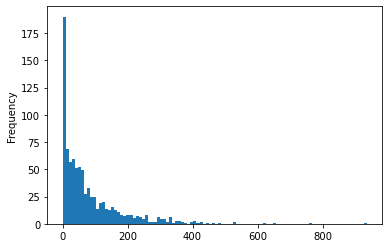

In [49]:
_ = imdb_movies['Revenue (Millions)'].plot.hist(bins=100)

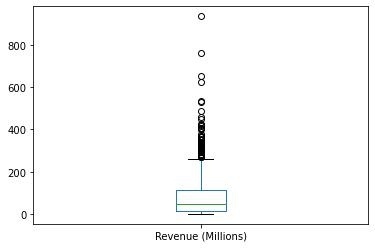

In [50]:
_ = imdb_movies['Revenue (Millions)'].plot.box()

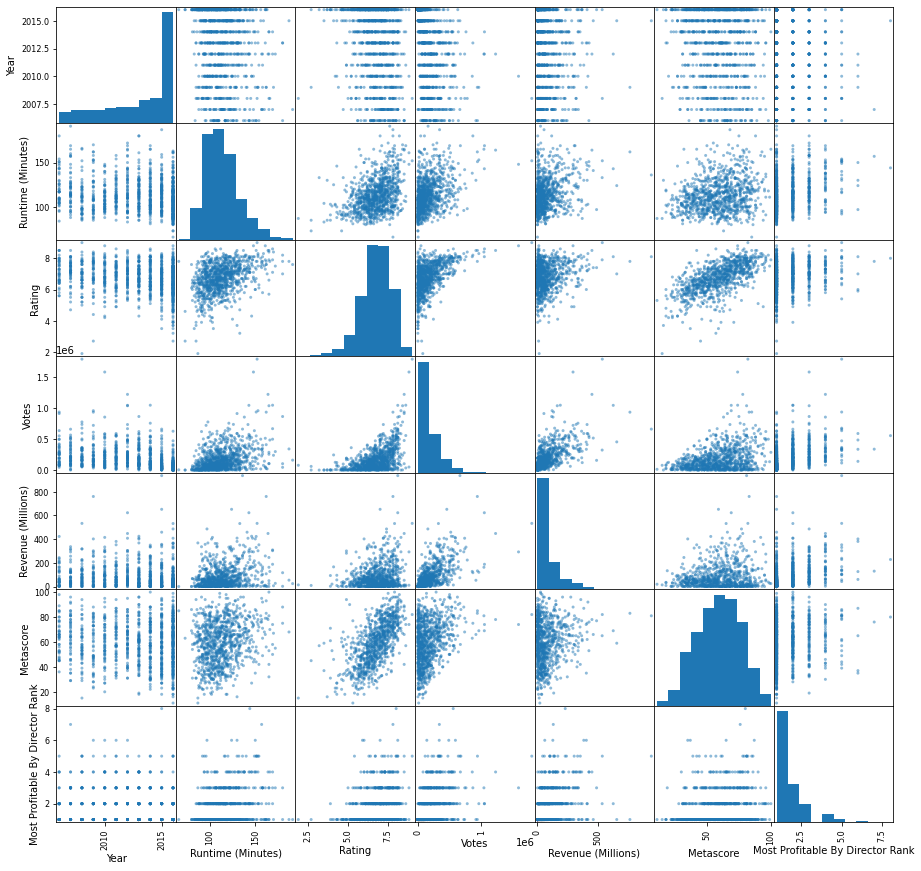

In [51]:
from pandas.plotting import scatter_matrix
_ = scatter_matrix(imdb_movies, figsize=(15, 15))